# **Analyzing the Profitability of Betting Against Jim Cramer's Stock Recommendations on Tweeter versus Inverse Cramer ETF (SJIM)**

## **Introduction**

This study aims to analyze the profitability of a contrarian investment strategy that involves opposing the stock recommendations of Jim Cramer, a renowned financial commentator known for his show "Mad Money" on CNBC and his active presence on Twitter. This phenomenon has given rise to the development of the Inverse Cramer Exchange-Traded Fund (ETF) named SJIM. The primary objective of this study is to assess the profitability of investing in the Inverse Cramer ETF (SJIM) compared to adopting positions that diverge from Jim Cramer's individual stock recommendations. The data pertaining to Cramer's recommendations will be collected from his Twitter account starting from March 2nd, 2023, and continuing until the end of April 2023. Stock data will be sourced from nasdaq.com for analysis.

By conducting a comparative analysis of the performance between SJIM and individual stocks that oppose Cramer's recommendations, this study aims to provide valuable insights into the feasibility and potential returns associated with this contrarian investment strategy. The analysis will encompass the period from SJIM's inception on March 2nd, 2023, to May 31st, 2023. Furthermore, factors such as the respective sectors of the underlying stocks and their performance relative to the pool of recommendations will be examined. The findings of this study will contribute to understanding the profitability of betting against Jim Cramer's stock recommendations and provide valuable insights for investors interested in exploring unconventional trading strategies.

(Please note that the results will be specific to the chosen time period and data sources used for analysis.)

## **Method and Plan**

#### **Data Collection:**
To collect the necessary data, the dates and stock ticker recommendations from Jim Cramer's Twitter page were manually recorded. Each tweet was carefully evaluated to determine the appropriate long or short position on the stock based on the context of Cramer's tweets. The individual recommended stock data was then extracted from nasdaq.com and compiled into a comprehensive CSV file. Additionally, data for the Inverse Cramer ETF (SJIM) was included as the primary point of comparison in this study.

#### **Evaluation and Trading Plan:**
In the trading plan, each tweet by Jim Cramer was treated as an opportunity to acquire 100 shares of SJIM in a long position, based on the Close/Last price of the day. These shares were held until the end of May 2023, covering the specified time period. A similar approach was adopted for the individual stocks. For each tweet, 100 shares of the corresponding stock were purchased in either a long or short position, based on the direction indicated by Cramer's recommendation. These shares were also held until the end of May 2023. By implementing this trading plan, the project aimed to assess the performance and profitability of both SJIM and the individual stocks traded in accordance with Cramer's recommendations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sjimdata = pd.read_csv('https://raw.githubusercontent.com/samyiu7/shortjimcramer/origin/SJIM.csv')
sjimdata

,Date,Ticker,Close/Last,Volume,Open,High,Low
0,03/02/2023,SJIM,25.0330,"80,875",24.9000,25.0700,24.8900
1,03/03/2023,SJIM,24.7800,"272,055",25.4400,25.4400,24.7450
2,03/06/2023,SJIM,24.7600,"22,505",24.9400,24.9400,24.7500
3,03/07/2023,SJIM,24.8330,"8,381",24.7000,24.8330,24.7000
4,03/08/2023,SJIM,24.7753,"5,113",25.0800,25.0800,24.7600
...,...,...,...,...,...,...,...
58,05/24/2023,SJIM,24.4704,"4,376",24.4329,24.4999,24.4300
59,05/25/2023,SJIM,24.5599,"1,747",24.5000,24.5900,24.5000
60,05/26/2023,SJIM,24.5046,"3,050",24.5500,24.6000,24.5046
61,05/30/2023,SJIM,24.5121,"2,868",24.3000,24.5500,24.3000


In [3]:
tickerdata = pd.read_csv('https://raw.githubusercontent.com/samyiu7/shortjimcramer/origin/TickerData.csv')
tickerdata

,Date,Ticker,Sector,Close/Last,Volume,Open,High,Low,Direction
0,03/08/2023,WE,Real Estate,1.19,"8,452,281",1.21,1.28,1.14,Buy
1,03/09/2023,WE,Real Estate,1.09,"8,418,034",1.16,1.20,1.08,Buy
2,03/10/2023,WE,Real Estate,0.94,"19,533,710",1.10,1.10,0.92,Buy
3,03/13/2023,WE,Real Estate,0.92,"12,614,030",0.96,0.96,0.89,Buy
4,03/14/2023,WE,Real Estate,0.91,"11,383,010",0.98,1.09,0.91,Buy
...,...,...,...,...,...,...,...,...,...
1387,05/24/2023,SBUX,Consumer Cyclical,99.61,"6,134,820",100.80,100.81,99.11,Buy
1388,05/25/2023,SBUX,Consumer Cyclical,98.44,"8,177,029",98.70,98.90,97.73,Buy
1389,05/26/2023,SBUX,Consumer Cyclical,98.53,"7,276,461",98.63,99.61,98.33,Buy
1390,05/30/2023,SBUX,Consumer Cyclical,97.75,"6,505,373",98.89,98.96,97.31,Buy


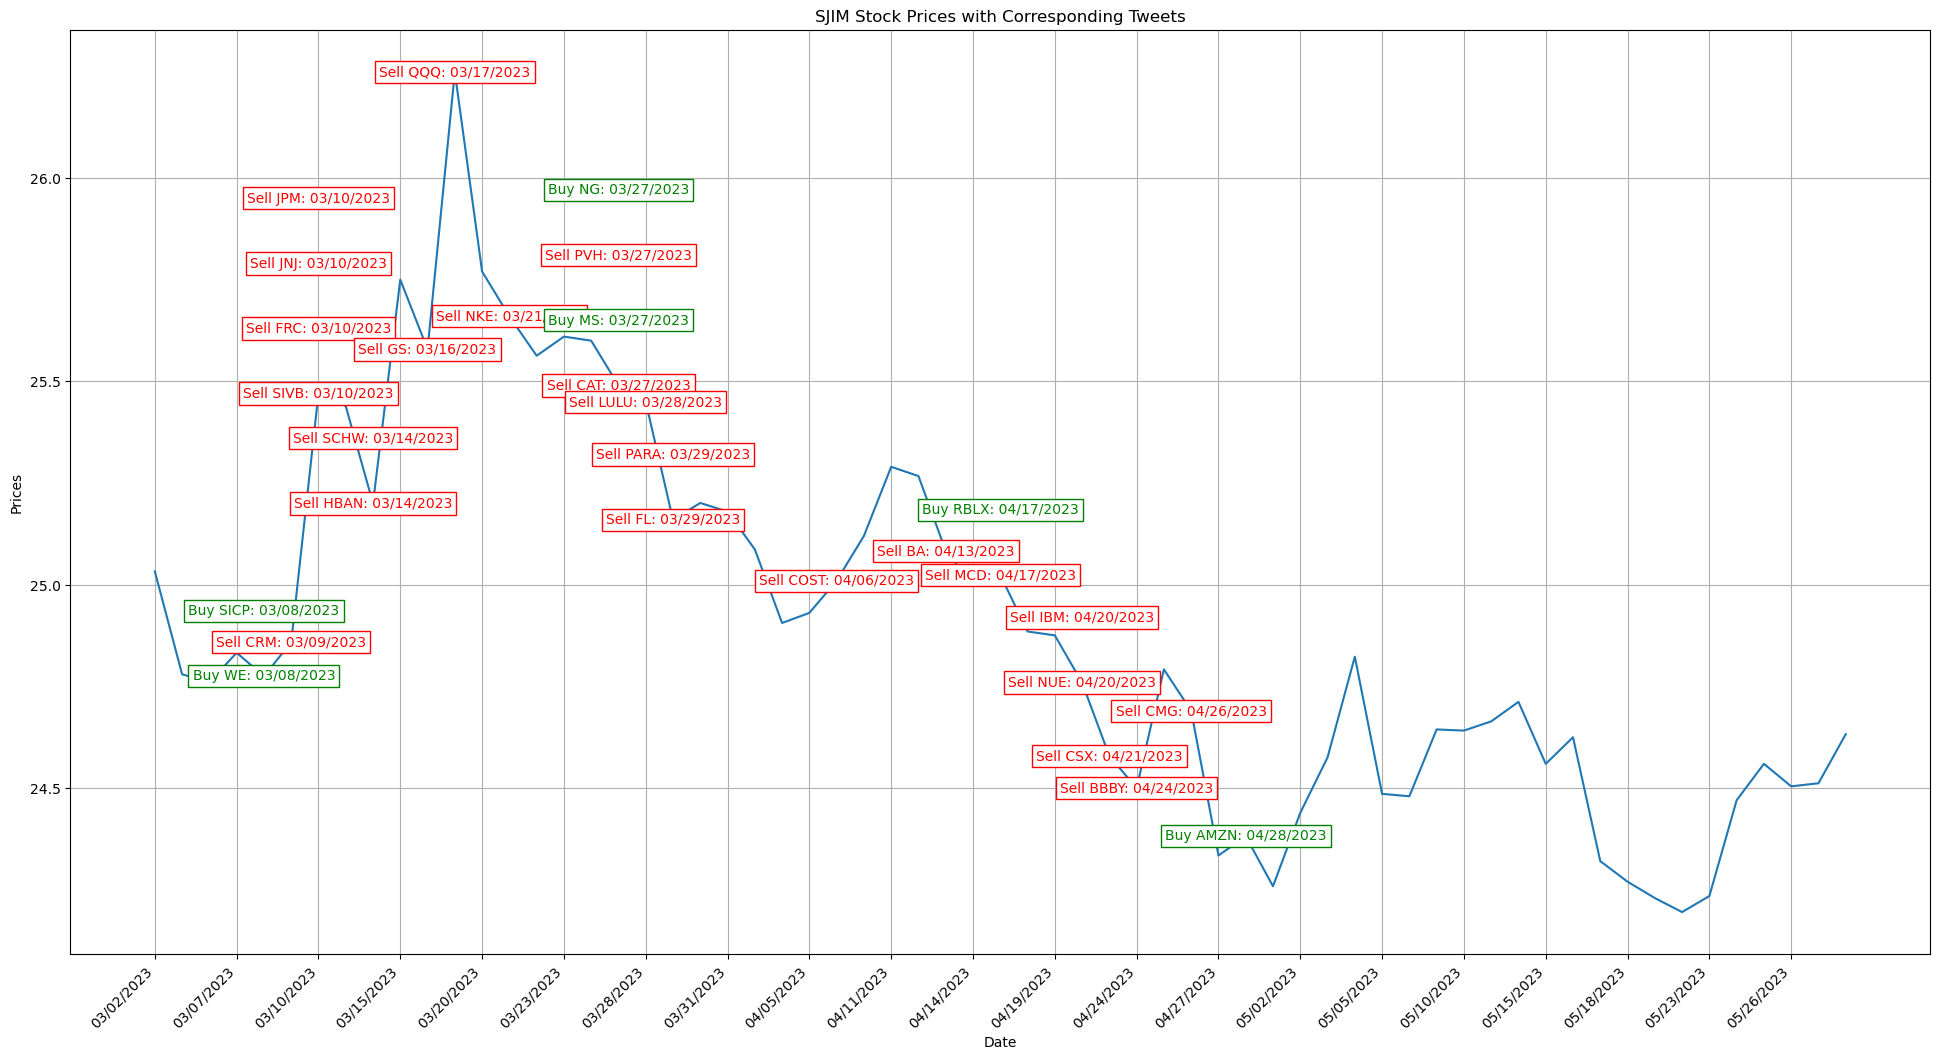

In [4]:
tweetdata = pd.read_csv('https://raw.githubusercontent.com/samyiu7/shortjimcramer/origin/Tweets.csv')

fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(sjimdata['Date'], sjimdata['Close/Last'])
ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
ax.set_title('SJIM Stock Prices with Corresponding Tweets')
ax.set_xticks(sjimdata['Date'][::3])
ax.set_xticklabels(sjimdata['Date'][::3], rotation=45, ha='right') 

y_positions = {}

for index, row in tweetdata.iterrows():
    tweet_date = row['Tweet Date']
    ticker = row['Ticker']
    direction = row['Direction']

    if direction == 'Buy':
        annotation = f'Buy {ticker}: {tweet_date}'
        color = 'green'
    elif direction == 'Sell':
        annotation = f'Sell {ticker}: {tweet_date}'
        color = 'red'
    else:
        continue

    idx = sjimdata[sjimdata['Date'] == tweet_date].index
    
    if not idx.empty:
        y_pos = sjimdata.loc[idx, 'Close/Last'].values[0]

        if tweet_date in y_positions:
            while y_pos in y_positions[tweet_date]:
                y_pos += 0.16

        if tweet_date not in y_positions:
            y_positions[tweet_date] = [y_pos]
        else:
            y_positions[tweet_date].append(y_pos)

        bbox_props = dict(boxstyle='square,pad=0.3', fc='white', ec=color, lw=1)
        ax.text(tweet_date, y_pos, annotation, ha='center', va='center', color=color, bbox=bbox_props)

plt.show()

## **Assessment of the Results:**

The analysis of the results revealed interesting findings when examining the plots titled "SJIM Performance Corresponding to Cramer's Tweets" and "Summed Individual Stock P&L." Despite fluctuations and gains and losses during the observed period, the overall impact on the Inverse Cramer ETF (SJIM) was not as significant as initially expected. The plot displayed a relatively narrow range of high and low points, within +4% and -4% respectively. These findings suggest that the contrarian investment strategy of betting against Jim Cramer's stock recommendations, as reflected by SJIM's performance, did not yield substantial deviations.

However, upon closer inspection of the "Summed Individual Stock P&L" plot, an initial inconsistency with the "SJIM Performance Corresponding to Cramer's Tweets" plot was identified. Further investigation revealed that the ticker 'SIVB' was the cause of this inconsistency. It was discovered that 'SIVB' experienced a trading halt during the observation period, leading to a dramatic price drop of -99% once the halt was lifted. To address this issue, 'SIVB' was excluded from the analysis of the remaining stocks. After removing 'SIVB' and recalculating the data, the "Summed Individual Stock P&L (excluding SIVB)" plot exhibited closer alignment with the "SJIM Performance Corresponding to Cramer's Tweets" plot.

To gain deeper insights, the top three performers and bottom three performers were separately plotted, allowing for a more comprehensive understanding of the stocks that contributed to the highs and lows. This approach provided valuable information regarding the factors influencing the resulting outcome.

The analysis of these plots offers valuable insights into the performance of SJIM and the individual stocks traded against Jim Cramer's recommendations. It suggests that the profitability of betting against Cramer's recommendations may not exhibit significant deviations, as evidenced by the relatively narrow range of high and low points in SJIM's performance. The exclusion of 'SIVB' from the analysis aided in aligning the overall trends between SJIM and the individual stock performance.

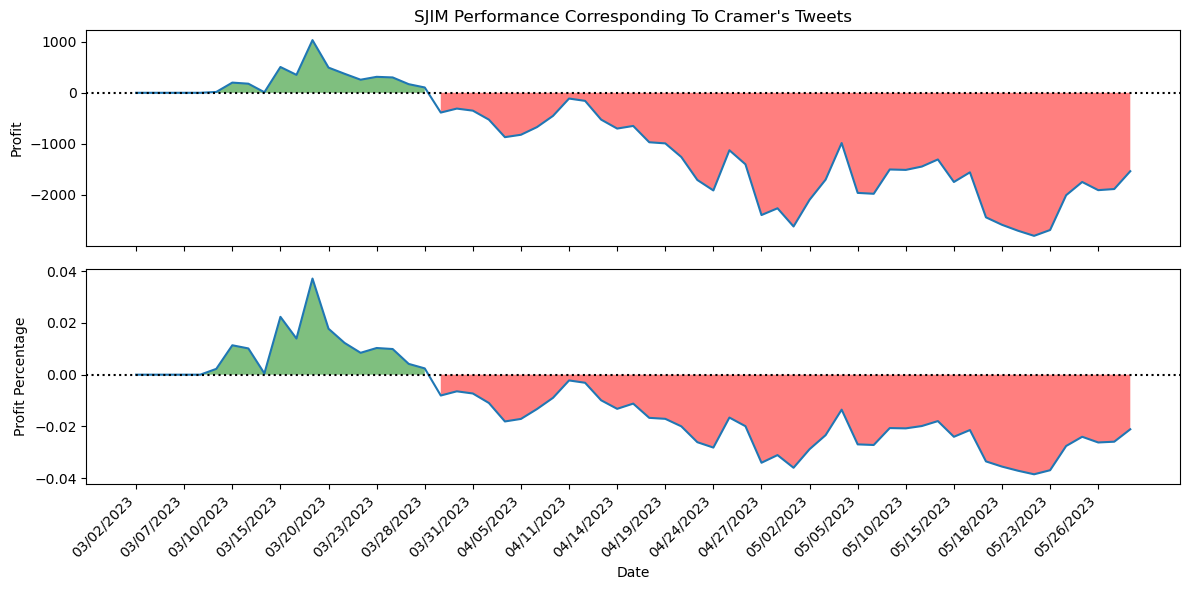

In [5]:
principle_amount = 0
shares = 0
profits = []
profits_percentage = []

for date in sjimdata['Date']:
    price = sjimdata[sjimdata['Date'] == date]['Close/Last'].values[0]
    if date in tweetdata['Tweet Date'].values:
        count = tweetdata['Tweet Date'].value_counts()[date]
        purchasequantity = count * 100
        shares += purchasequantity
        principle_amount += (purchasequantity * price)
        profit = (shares * price) - principle_amount
        profits.append(profit)
        if principle_amount != 0:  
            profit_change = (profit / principle_amount)
        else:
            profit_change = 0
        profits_percentage.append(profit_change)
    else:
        profit = (shares * price) - principle_amount
        profits.append(profit)
        if principle_amount != 0:  
            profit_change = (profit / principle_amount)
        else:
            profit_change = 0
        profits_percentage.append(profit_change)


profits = np.array(profits)
profits_percentage = np.array(profits_percentage)

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

above_color = 'green'
below_color = 'red'

ax[0].plot(sjimdata['Date'], profits)
ax[0].fill_between(sjimdata['Date'], profits, 0, where=(profits >= 0), facecolor='green', alpha=0.5)
ax[0].fill_between(sjimdata['Date'], profits, 0, where=(profits_percentage < 0), facecolor='red', alpha=0.5)
ax[0].axhline(y=0, color='black', linestyle='dotted')
ax[0].set_ylabel('Profit')
ax[0].set_title('SJIM Performance Corresponding To Cramer\'s Tweets')

ax[1].plot(sjimdata['Date'], profits_percentage)
ax[1].fill_between(sjimdata['Date'], profits_percentage, 0, where=(profits_percentage >= 0), facecolor=above_color, alpha=0.5)
ax[1].fill_between(sjimdata['Date'], profits_percentage, 0, where=(profits_percentage < 0), facecolor=below_color, alpha=0.5)
ax[1].axhline(y=0, color='black', linestyle='dotted')
ax[1].set_xlabel('Date')
ax[1].set_xticks(sjimdata['Date'][::3])
ax[1].set_xticklabels(sjimdata['Date'][::3], rotation=45, ha='right') 
ax[1].set_ylabel('Profit Percentage')

fig.tight_layout()
plt.show()

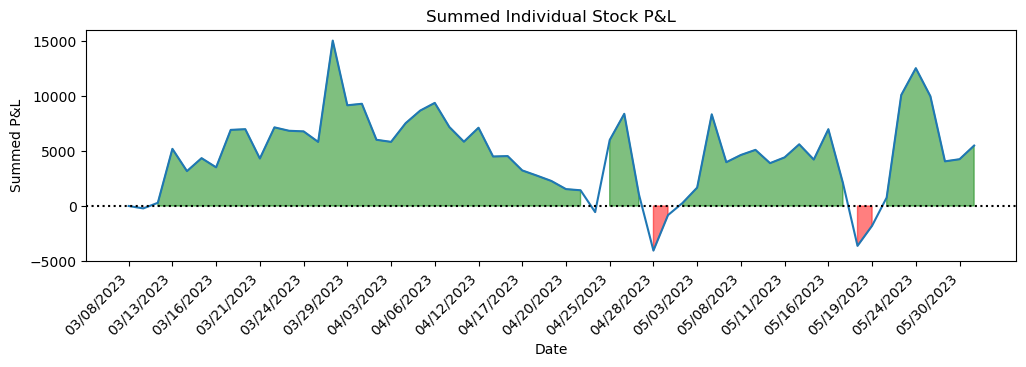

In [6]:
tickers = tickerdata['Ticker'].unique()

def calculate_pnl(ticker):
    pnl = []
    ticker_rows = tickerdata[tickerdata['Ticker'] == ticker]
    initial_investment = ticker_rows.iloc[0]['Close/Last'] * 100
    sorted_rows = ticker_rows.sort_values('Date')
    investment = initial_investment
    
    for _, row in sorted_rows.iterrows():
        price = row['Close/Last']
        direction = row['Direction']
        
        if direction == 'Buy':
            daily_pnl = (price * 100) - initial_investment
        elif direction == 'Sell':
            daily_pnl = -((price * 100) - initial_investment)
        else:
            daily_pnl = 0  
        pnl.append(daily_pnl)
    
    return pnl

result = np.array([(ticker, calculate_pnl(ticker)) for ticker in tickers], dtype=[('ticker', 'U10'), ('pnl', 'object')])
max_length = len(result[0]['pnl'])

# Pad the pnl arrays with zeros at the beginning
for i in range(len(result)):
    pnl = result['pnl'][i]
    padding_length = max_length - len(pnl)
    padded_pnl = np.pad(pnl, (padding_length, 0), mode='constant')
    result['pnl'][i] = padded_pnl
    
# Removing 'SIVB' (outlier)
sivb_index = np.where(result['ticker'] == 'SIVB')[0]
result_no_SIVB = np.delete(result, sivb_index, axis=0)

total_pnl = np.sum(result['pnl'], axis=0)
true_pnl = np.sum(result_no_SIVB['pnl'], axis=0)

fig, ax = plt.subplots(1, figsize=(12, 3))

# Using 'WE' dates
dates = tickerdata[tickerdata['Ticker'] == 'WE']['Date']
x = np.arange(len(dates))

ax.plot(x, total_pnl)
ax.fill_between(x, total_pnl, where=total_pnl >= 0, color=above_color, alpha=0.5)
ax.fill_between(x, total_pnl, where=total_pnl < 0, color=below_color, alpha=0.5)
ax.set_xticks(x[::3])  
ax.set_xticklabels(dates[::3], rotation=45, ha='right')  
ax.axhline(y=0, color='black', linestyle='dotted')
ax.set_xlabel('Date')
ax.set_ylabel('Summed P&L')
ax.set_title('Summed Individual Stock P&L')
plt.show()

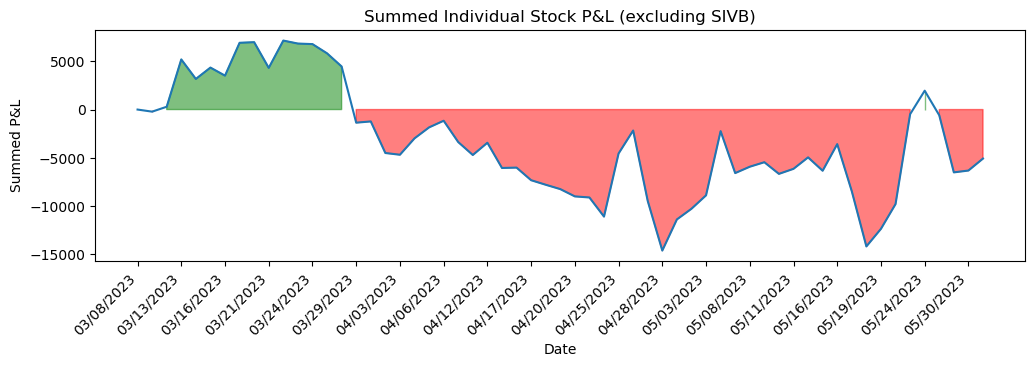

In [22]:
fig, ax = plt.subplots(1, figsize=(12, 3))
x = np.arange(len(dates))

ax.plot(x, true_pnl)
ax.fill_between(x, true_pnl, where=true_pnl >= 0, color=above_color, alpha=0.5)
ax.fill_between(x, true_pnl, where=true_pnl < 0, color=below_color, alpha=0.5)
ax.set_xticks(x[::3]) 
ax.set_xticklabels(dates[::3], rotation=45, ha='right')  
ax.set_xlabel('Date')
ax.set_ylabel('Summed P&L')
ax.set_title('Summed Individual Stock P&L (excluding SIVB)')
plt.show()

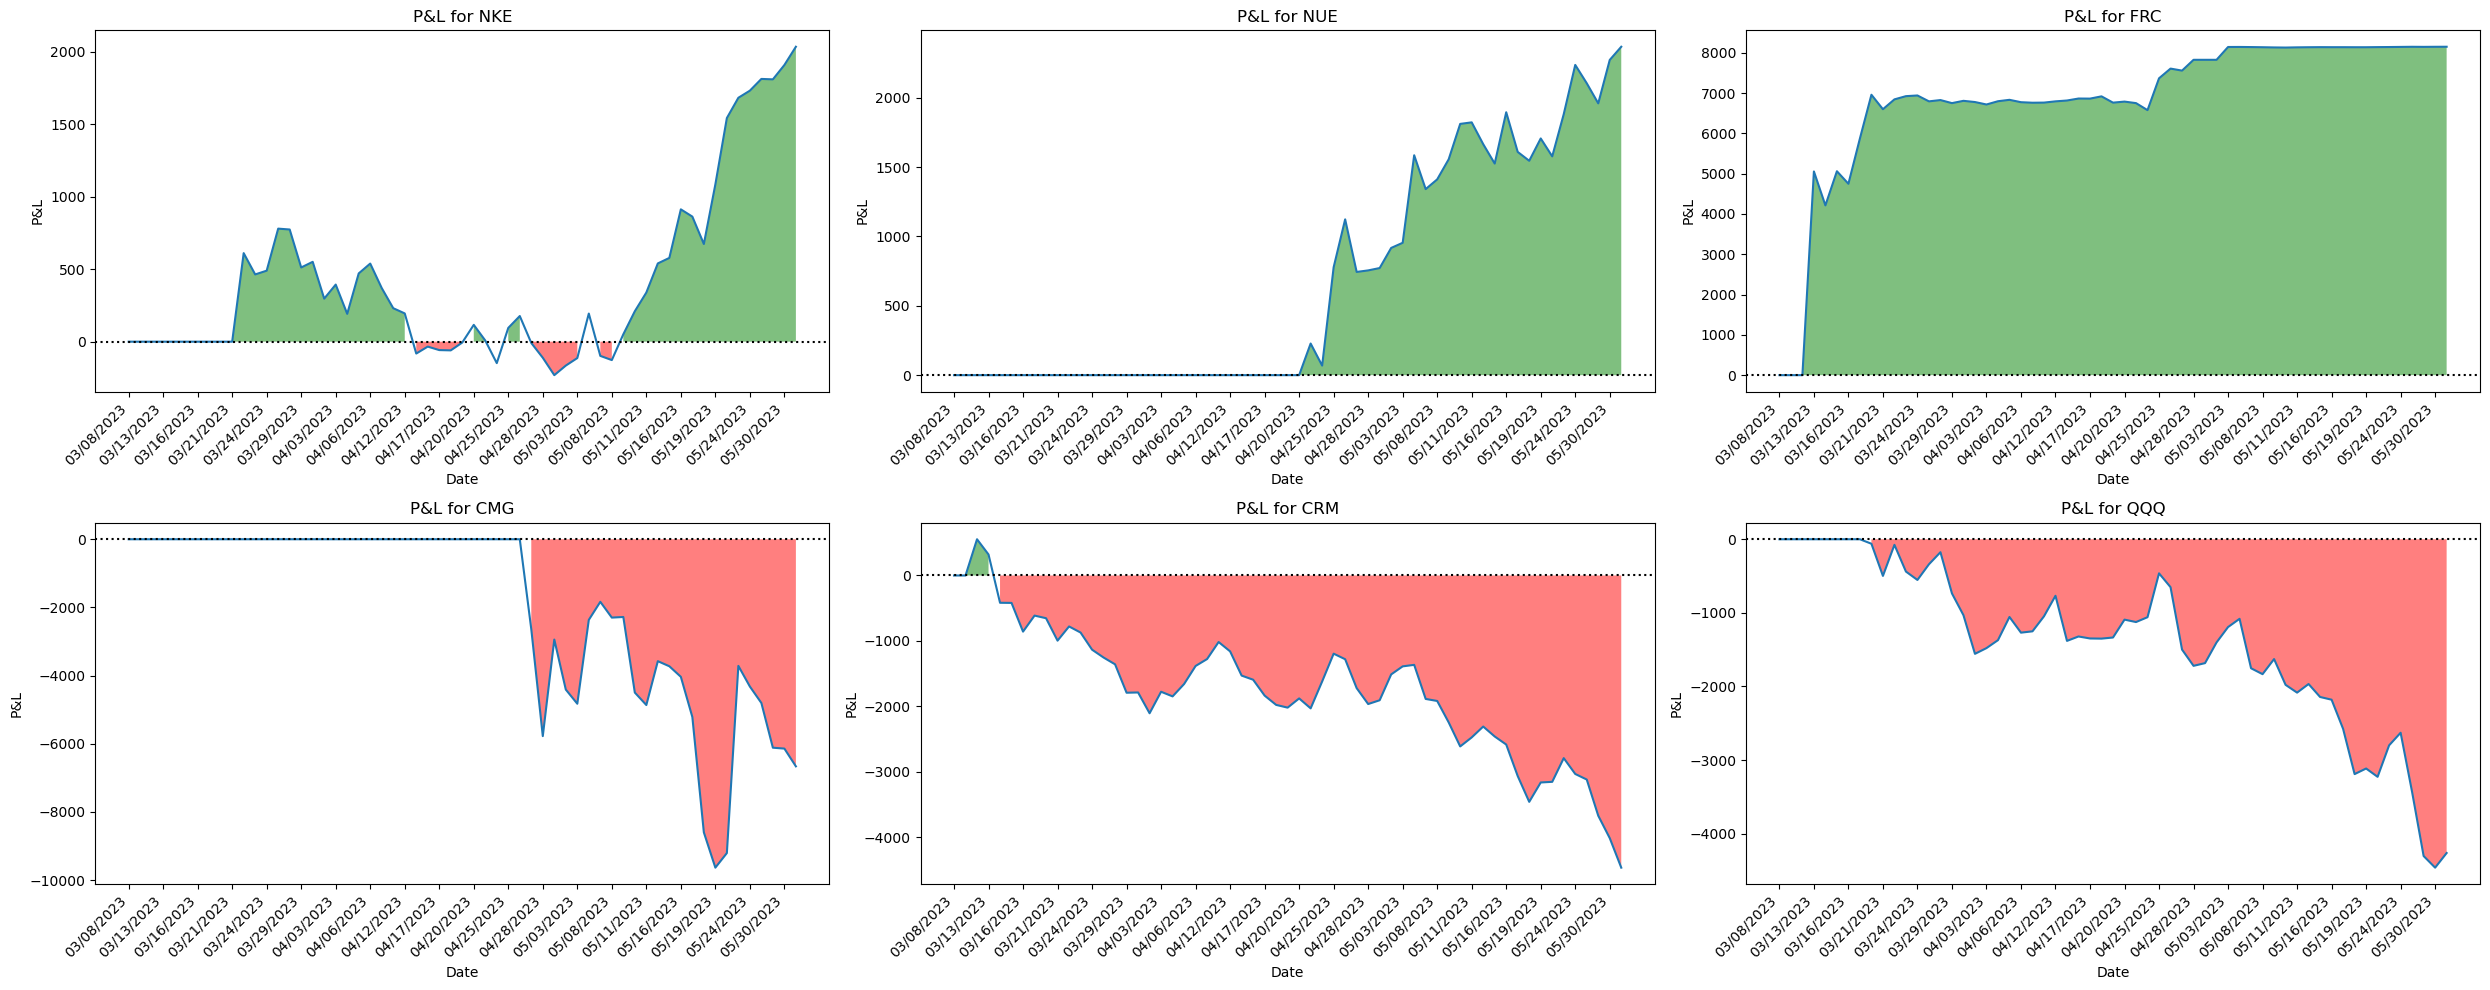

In [8]:
sorted_pnl = np.argsort([arr[-1] for arr in result_no_SIVB['pnl']]) 
top_3_tickers = result_no_SIVB['ticker'][sorted_pnl[-3:]]  
bot_3_tickers = result_no_SIVB['ticker'][sorted_pnl[:3]]

tickers_of_interest = top_3_tickers
mask = np.isin(result_no_SIVB['ticker'], tickers_of_interest)
filtered_result = result_no_SIVB[mask]
dates = tickerdata[tickerdata['Ticker'] == 'WE']['Date'].values

fig, axes = plt.subplots(2, 3, figsize=(25, 10))

for i, ticker in enumerate(tickers_of_interest):
    pnl = filtered_result[filtered_result['ticker'] == ticker]['pnl'][0]
    ax = axes[0, i]
    ax.plot(dates[:len(pnl)], pnl)
    ax.fill_between(dates[:len(pnl)], pnl, 0, where=(pnl >= 0), facecolor='green', alpha=0.5)
    ax.fill_between(dates[:len(pnl)], pnl, 0, where=(pnl < 0), facecolor='red', alpha=0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('P&L')
    ax.set_title(f'P&L for {ticker}')
    ax.axhline(y=0, color='black', linestyle='dotted')

    ax.set_xticks(np.arange(0, len(dates), 3))
    ax.set_xticklabels(dates[::3], rotation=45, ha='right')

tickers_of_interest = bot_3_tickers
mask = np.isin(result_no_SIVB['ticker'], tickers_of_interest)
filtered_result = result_no_SIVB[mask]
dates = tickerdata[tickerdata['Ticker'] == 'WE']['Date'].values

for i, ticker in enumerate(tickers_of_interest):
    pnl = filtered_result[filtered_result['ticker'] == ticker]['pnl'][0]
    ax = axes[1, i]
    ax.plot(dates[:len(pnl)], pnl)
    ax.fill_between(dates[:len(pnl)], pnl, 0, where=(pnl >= 0), facecolor='green', alpha=0.5)
    ax.fill_between(dates[:len(pnl)], pnl, 0, where=(pnl < 0), facecolor='red', alpha=0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('P&L')
    ax.set_title(f'P&L for {ticker}')
    ax.axhline(y=0, color='black', linestyle='dotted')

    ax.set_xticks(np.arange(0, len(dates), 3))
    ax.set_xticklabels(dates[::3], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **Discussion:**

In order to gain deeper insights into the performance of SJIM and the individual stocks, additional analysis was conducted by categorizing the individual stocks based on their respective sectors. This classification aimed to uncover any underlying relationships that could explain the observed performance patterns. Upon analyzing the results, a recurring factor that emerged was the concept of "risk premium." The concept of "risk premium" pertains to the level of risk that is factored into the pricing of the underlying stocks. The relationship between sector performance and the risk premium became apparent upon examination of the findings. Sectors that exhibited strong performance were likely perceived by Jim Cramer as having lower levels of risk, resulting in a lower risk premium being priced into those stocks. Conversely, sectors that demonstrated poor performance when betting against Cramer's recommendations likely reflected a higher degree of risk being factored into those stocks. These findings suggest that Jim Cramer's stock recommendations may be influenced by his perception of risk and its impact on the pricing of underlying stocks. When Cramer recommends stocks in sectors with a lower perceived risk, betting against his recommendations may present more lucrative opportunities as the risk premium is not fully reflected in the pricing. Conversely, sectors in which Cramer's recommendations are associated with a higher perceived risk may result in less profitable outcomes since a lot of risk have been priced.

To provide context for the analysis period, it's important to note that the US Federal Reserve has been consistently implementing rate hikes over the past year to address post-COVID inflation. Consequently, most sectors in the market have experienced a downtrend. However, Jim Cramer has expressed confidence in the Banking/Financial sector, frequently recommending US banks as a safe place to invest capital until the rate hike regime is over. Cramer's belief is based on the assumption that the banks will not fail, given the US government's history of bailing out financial institutions. During the analysis period, banks like Silvergate and Silicon Valley collapsed, causing a significant loss of confidence in the sector and raising concerns about which bank could be next. Meanwhile, Jim Cramer viewed this as an opportunity due to his biased outlook on the financial sector at the time. In contrast, Cramer was critical of the Technology sector, expecting investment to decrease due to the higher cost of borrowing resulting from the rate hike. However, the sector performed better than anticipated, likely because the market had already factored in the anticipated challenges.

By considering the interplay between sector performance, risk premium, and the outcomes of betting against Cramer's recommendations, investors can gain a deeper understanding of the factors driving the observed results. This insight provides valuable information for investors interested in evaluating the profitability of contrarian investment strategies and the influence of risk perceptions on stock performance. It is important to note that this analysis is based on the available data and the specific time period considered in the study. While the identified relationship between sector performance and risk premium offers a potential explanation for the observed outcomes, it is worth acknowledging that other factors may also contribute to the results.

Further research and analysis are recommended to explore additional variables that may impact the profitability of betting against Jim Cramer's recommendations and to validate the findings of this study. By considering a broader range of factors, investors can enhance their understanding of the dynamics involved in contrarian investment strategies and make more informed investment decisions.

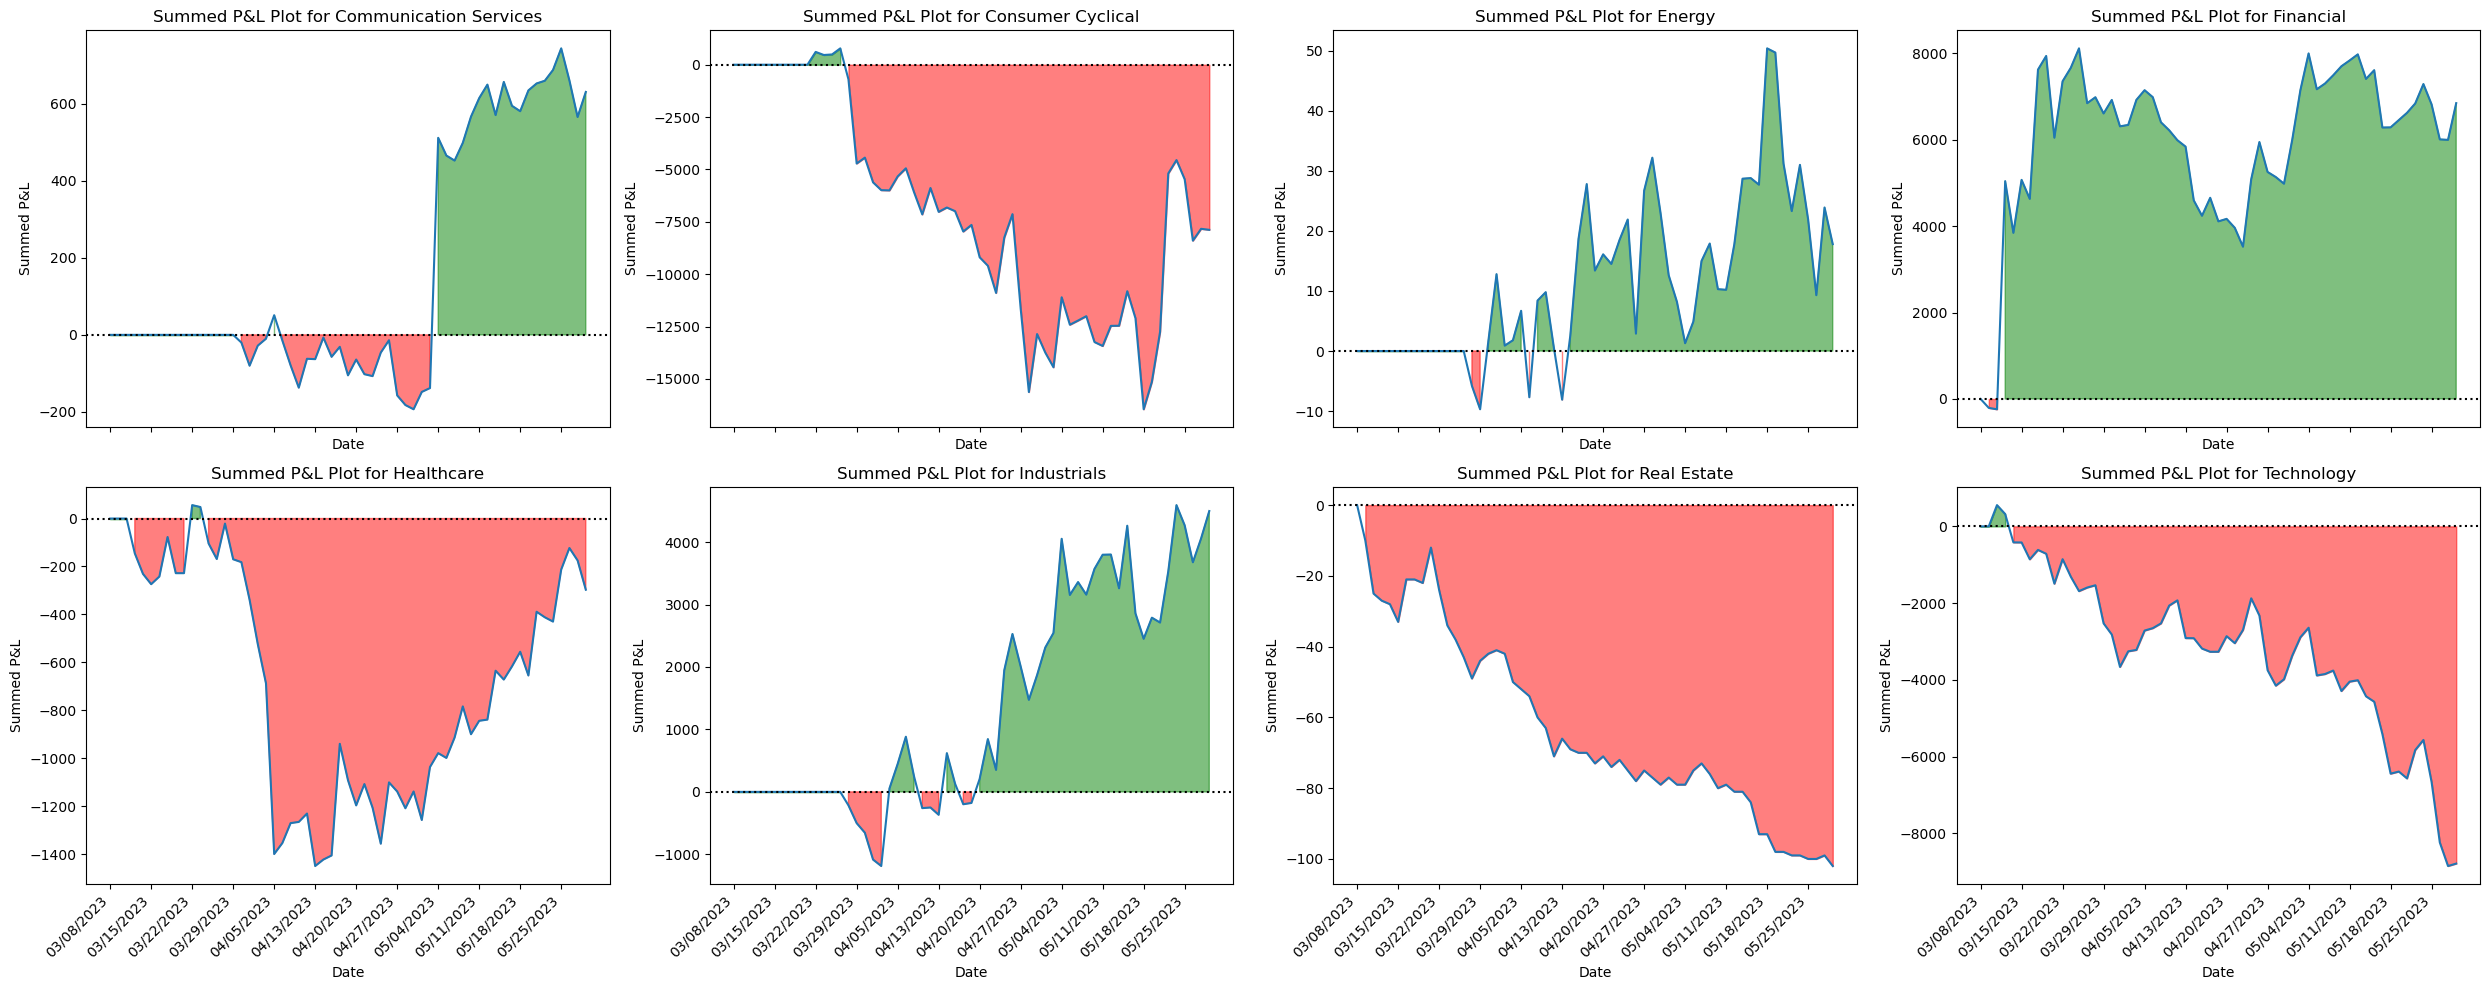

In [9]:
sectors = tickerdata['Sector'].unique()
sector_groups = tickerdata.groupby('Sector')['Ticker'].unique()
sector_groups_dict = sector_groups.to_dict()
sector_groups_dict['Financial'] = np.delete(sector_groups_dict['Financial'], np.where(sector_groups_dict['Financial'] == 'SIVB'))

sector_pnl = {}

for sector, tickers in sector_groups_dict.items():
    pnl_list = [calculate_pnl(ticker) for ticker in tickers]
    
    for i, pnl in enumerate(pnl_list):
        padding_length = max_length - len(pnl)
        padded_pnl = np.pad(pnl, (padding_length, 0), mode='constant')
        pnl_list[i] = padded_pnl
    
    sector_pnl[sector] = np.sum(pnl_list, axis=0)

fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharex=True)

for i, (sector, pnl) in enumerate(sector_pnl.items()):
    row = i // 4 
    col = i % 4  
    
    ax = axes[row, col]  
    
    dates = tickerdata[tickerdata['Ticker'] == 'WE']['Date']
    x = np.arange(len(dates))
    
    ax.plot(x, pnl)
    ax.fill_between(x, pnl, where=pnl >= 0, color=above_color, alpha=0.5)
    ax.fill_between(x, pnl, where=pnl < 0, color=below_color, alpha=0.5)
    ax.set_xticks(x[::5])
    ax.set_xticklabels(dates[:len(pnl)][::5], rotation=45, ha='right')
    ax.axhline(y=0, color='black', linestyle='dotted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Summed P&L')
    ax.set_title(f'Summed P&L Plot for {sector}')

fig.tight_layout()
plt.show()

## **Conclusion:**

In conclusion, this study conducted a broad analysis in assessing the profitability of betting against Jim Cramer's stock recommendations. By comparing the performance of the Inverse Cramer ETF (SJIM) with individual stocks opposite to Cramer's recommendations, valuable insights were obtained, offering guidance to investors interested in exploring contrarian investment strategies and further understand Jim Cramer's thought process when favoring one stock over the other. A significant finding from the analysis is that SJIM, representing a contrarian approach, exhibited relatively modest gains and losses within a range of +4% and -4% during the observation period. This suggests that utilizing SJIM for betting against Jim Cramer's recommendations can provide a more stable investment strategy with reduced volatility. However, it also implies that the potential for substantial gains may be limited. Furthermore, the analysis of individual stock performance highlighted the importance of considering the concept of "risk premium." It underscores how volatility and significant fluctuations in stock prices can be attributed to stocks being undervalued and not adequately priced in accordance with the prevailing market conditions. When deciding between SJIM and individual stock investments, investors should take into account their personal risk tolerance. SJIM offers stability and lower volatility but may restrict the potential for significant gains. On the other hand, investing in individual stocks presents the opportunity for higher returns, but it also exposes investors to greater volatility and risk. It is important to note that this study focused solely on analyzing Jim Cramer's Twitter recommendations and did not consider recommendations made on his show "Mad Money." Future research could expand the analysis to incorporate recommendations from the show, thereby providing a more comprehensive understanding of the profitability of betting against Cramer's recommendations.

In summary, this study sheds light on the profitability of betting against Jim Cramer's stock recommendations and emphasizes the importance of considering risk premium and personal risk tolerance in investment decision-making. The findings contribute to the broader knowledge of contrarian investment strategies and offer valuable insights for investors seeking alternative trading approaches. To enhance understanding and facilitate informed investment decisions, it is recommended that investors conduct further exploration and validation of these findings. This could involve considering additional variables and extending the observation period to gain more robust insights into the profitability of betting against Jim Cramer's recommendations.